https://www.alpha-i.co/blog/MNIST-for-ML-beginners-The-Bayesian-Way.html

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#from edward.models import Categorical, Normal
#import edward as ed
import pandas as pd
import pickle
#ed.set_seed(314159)

In [2]:
deltas = pd.read_csv('logisticparam.csv')
betas = pd.read_csv('priormean.csv')

In [3]:
xaxis = deltas.x

In [4]:
saem = deltas["saem.ep"]
mcem = deltas["mcem.ep"]
misso = deltas["imcem.ep"]
misso10 = deltas["imcem10.ep"]
misso50 = deltas["imcem50.ep"]

In [5]:
saemb = betas["saem.ep"]
mcemb = betas["mcem.ep"]
missob = betas["imcem.ep"]
misso10b = betas["imcem10.ep"]
misso50b = betas["imcem50.ep"]

In [6]:
timesaem=2033   
timemcem= 1972
timemisso= 2245
timemisso10= 2139
timemisso50= 2005

In [7]:
factormisso = round(timemisso/10) +1
factorsaem = round(timesaem/10) +1
factormcem = round(timemcem/10) +1
factormisso10 = round(timemisso10/10) +1
factormisso50 = round(timemisso50/10) +1

In [9]:
xaxissaem = range(0,timesaem,factorsaem)
xaxismcem = range(0,timemcem,factormcem)
xaxismisso = range(0,timemisso,factormisso)
xaxismisso10 = range(0,timemisso10,factormisso10)
xaxismisso50 = range(0,timemisso50,factormisso50)

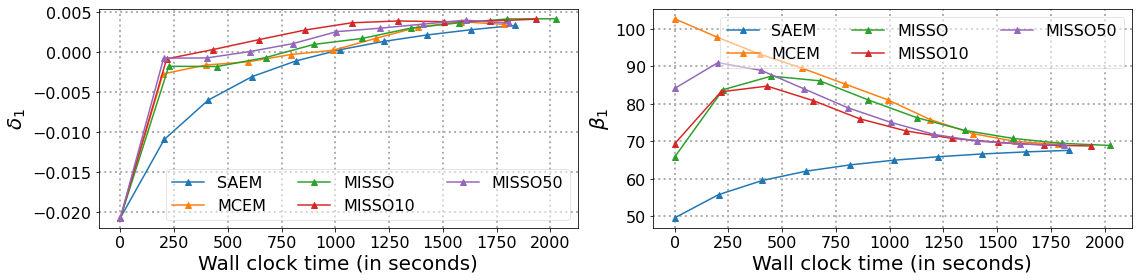

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 4))
ax = plt.subplot(1, 2, 1)
#ax.set_yscale('log')
#ax.set_xscale('log')
plt.plot(xaxissaem, saem[0:len(xaxissaem)], label='SAEM', marker='^')
plt.plot(xaxismcem, mcem[0:len(xaxismcem)], label='MCEM', marker='^')
plt.plot(xaxismisso, misso[0:len(xaxismisso)], label='MISSO', marker='^')
plt.plot(xaxismisso10, misso10[0:len(xaxismisso10)], label='MISSO10', marker='^')
plt.plot(xaxismisso50, misso50[0:len(xaxismisso50)], label='MISSO50', marker='^')
leg = plt.legend(fontsize=16,fancybox=True, loc=0,ncol=3)
leg.get_frame().set_alpha(0.5)
plt.xlabel('Wall clock time (in seconds)', fontsize=20)
plt.ylabel(r'$\delta_1$', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(linestyle='dotted',linewidth=2)

ax = plt.subplot(1, 2, 2)
#ax.set_yscale('log')
plt.plot(xaxissaem, saemb[0:len(xaxissaem)], label='SAEM', marker='^')
plt.plot(xaxismcem, mcemb[0:len(xaxismcem)], label='MCEM', marker='^')
plt.plot(xaxismisso, missob[0:len(xaxismisso)], label='MISSO', marker='^')
plt.plot(xaxismisso10, misso10b[0:len(xaxismisso10)], label='MISSO10', marker='^')
plt.plot(xaxismisso50, misso50b[0:len(xaxismisso50)], label='MISSO50', marker='^')
leg = plt.legend(fontsize=16,fancybox=True, loc=0,ncol=3)
leg.get_frame().set_alpha(0.5)
plt.xlabel('Wall clock time (in seconds)', fontsize=20)
plt.ylabel(r'$\beta_1$', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(linestyle='dotted',linewidth=2)
fig.tight_layout()
plt.show()

In [15]:
fig.savefig("traumabasenoexp_wallclock.png",bbox_inches = 'tight')

fig.savefig("traumabasenosaem.png",bbox_inches = 'tight')

In [13]:
import pandas as pd
dfsaem = pd.DataFrame({'time': xaxissaem, 'value': saemb[0:len(xaxissaem)]})
dfmcem = pd.DataFrame({'time': xaxismcem, 'value': mcemb[0:len(xaxismcem)]})
dfmisso = pd.DataFrame({'time': xaxismisso, 'value': missob[0:len(xaxismisso)]})
dfmisso10 = pd.DataFrame({'time': xaxismisso10, 'value': misso10b[0:len(xaxismisso10)]})
dfmisso50 = pd.DataFrame({'time': xaxismisso50, 'value': misso50b[0:len(xaxismisso50)]})
np.savetxt(r'saemb.txt', dfsaem.values, fmt='%1.3f')
np.savetxt(r'mcemb.txt', dfmcem.values, fmt='%1.3f')
np.savetxt(r'missob.txt', dfmisso.values, fmt='%1.3f')
np.savetxt(r'misso10b.txt', dfmisso10.values, fmt='%1.3f')
np.savetxt(r'misso50b.txt', dfmisso50.values, fmt='%1.3f')

In [14]:
import pandas as pd
dfsaem = pd.DataFrame({'time': xaxissaem, 'value': saem[0:len(xaxissaem)]})
dfmcem = pd.DataFrame({'time': xaxismcem, 'value': mcem[0:len(xaxismcem)]})
dfmisso = pd.DataFrame({'time': xaxismisso, 'value': misso[0:len(xaxismisso)]})
dfmisso10 = pd.DataFrame({'time': xaxismisso10, 'value': misso10[0:len(xaxismisso10)]})
dfmisso50 = pd.DataFrame({'time': xaxismisso50, 'value': misso50[0:len(xaxismisso50)]})
np.savetxt(r'saem.txt', dfsaem.values, fmt='%1.3f')
np.savetxt(r'mcem.txt', dfmcem.values, fmt='%1.3f')
np.savetxt(r'misso.txt', dfmisso.values, fmt='%1.3f')
np.savetxt(r'misso10.txt', dfmisso10.values, fmt='%1.3f')
np.savetxt(r'misso50.txt', dfmisso50.values, fmt='%1.3f')